In [1]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mehme\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data(battery):
    mat = loadmat( battery + '.mat')
    print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
    counter = 0
    dataset = []
    capacity_data = []

    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                   int(row['time'][0][1]),
                                   int(row['time'][0][2]),
                                   int(row['time'][0][3]),
                                    int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                current_load = data[0][0]['Current_load'][0][j]
                voltage_load = data[0][0]['Voltage_load'][0][j]
                time = data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                                voltage_measured, current_measured,
                                temperature_measured, current_load,
                                voltage_load, time])
            capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
            counter = counter + 1
        
    return [pd.DataFrame(data=dataset,
                                   columns=['cycle', 'ambient_temperature', 'datetime',
                                            'capacity', 'voltage_measured',
                                            'current_measured', 'temperature_measured',
                                            'current_load', 'voltage_load', 'time']),
                      pd.DataFrame(data=capacity_data,
                                   columns=['cycle', 'ambient_temperature', 'datetime',
                                            'capacity'])]
dataset, capacity = load_data('B0006')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()

Total data in dataset:  616
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  2.035338          4.179800   
1      1                   24 2008-04-02 15:25:41  2.035338          4.179823   
2      1                   24 2008-04-02 15:25:41  2.035338          3.966528   
3      1                   24 2008-04-02 15:25:41  2.035338          3.945886   
4      1                   24 2008-04-02 15:25:41  2.035338          3.930354   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.002366             24.277568       -0.0006         0.000   0.000  
1          0.000434             24.277073       -0.0006         4.195  16.781  
2         -2.014242             24.366226       -1.9990         3.070  35.703  
3         -2.008730             24.515123       -1.9990         3.045  53.781  
4         -2.013381             24.676053       -1.9990         3.026  71.922  


,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.524719,3.457464,-1.773513,32.844374,1.306434,2.262837,1546.208924
std,45.699687,0.0,0.233458,0.249892,0.647669,4.143796,1.348294,0.851166,906.640295
min,1.000000,24.0,1.153818,2.120698,-2.027018,23.201272,-1.999200,0.000000,0.000000
25%,50.000000,24.0,1.347410,3.321433,-2.011178,29.653775,1.998800,2.330000,768.563000
50%,88.000000,24.0,1.473215,3.466565,-2.010095,32.940629,1.999000,2.525000,1537.031000
75%,127.000000,24.0,1.729207,3.621686,-2.008816,36.092889,1.999000,2.693000,2305.984000
max,168.000000,24.0,2.035338,4.222516,0.008809,42.007540,1.999200,4.238000,3690.234000


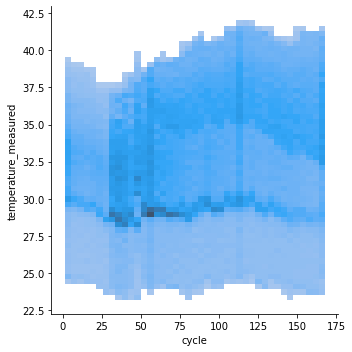

In [20]:
import seaborn as sns
sns.displot(x = "cycle", y = "temperature_measured", data = dataset)

In [3]:
dataset.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,2.035338,4.179800,-0.002366,24.277568,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,2.035338,4.179823,0.000434,24.277073,-0.0006,4.195,16.781
2,1,24,2008-04-02 15:25:41,2.035338,3.966528,-2.014242,24.366226,-1.9990,3.070,35.703
3,1,24,2008-04-02 15:25:41,2.035338,3.945886,-2.008730,24.515123,-1.9990,3.045,53.781
4,1,24,2008-04-02 15:25:41,2.035338,3.930354,-2.013381,24.676053,-1.9990,3.026,71.922


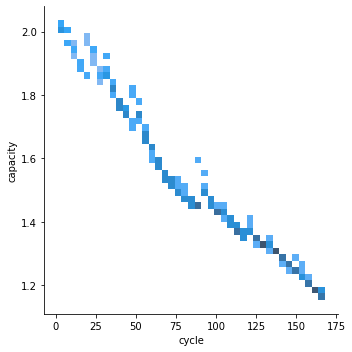

In [22]:
sns.displot(x = "cycle", y = "capacity", data = dataset)

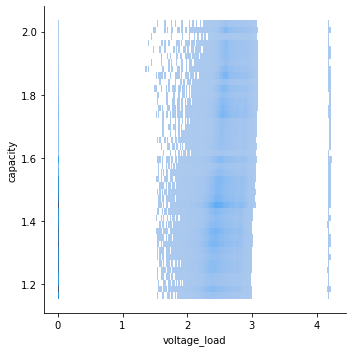

In [23]:
sns.displot(x = "voltage_load", y="capacity", data = dataset)

<AxesSubplot:>

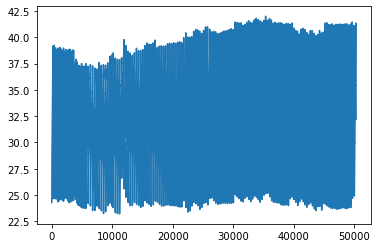

In [32]:
dataset["temperature_measured"].plot()

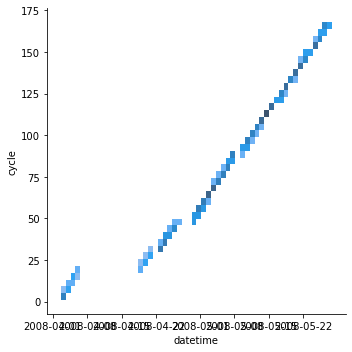

In [50]:
sns.displot(x = "datetime", y = "cycle", data = dataset)

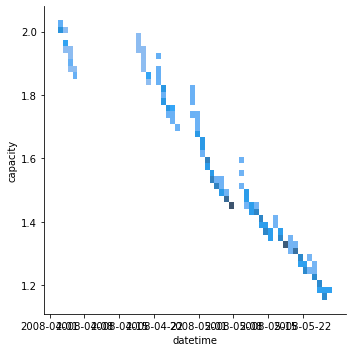

In [38]:
sns.displot(x= "datetime", y = "capacity", data = dataset)

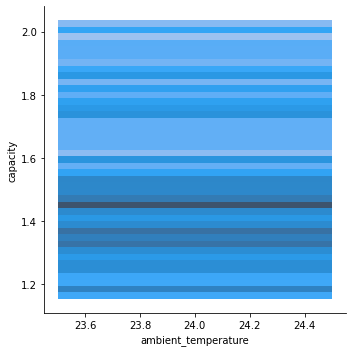

In [48]:
sns.displot(x = "ambient_temperature" , y = "capacity", data = dataset)

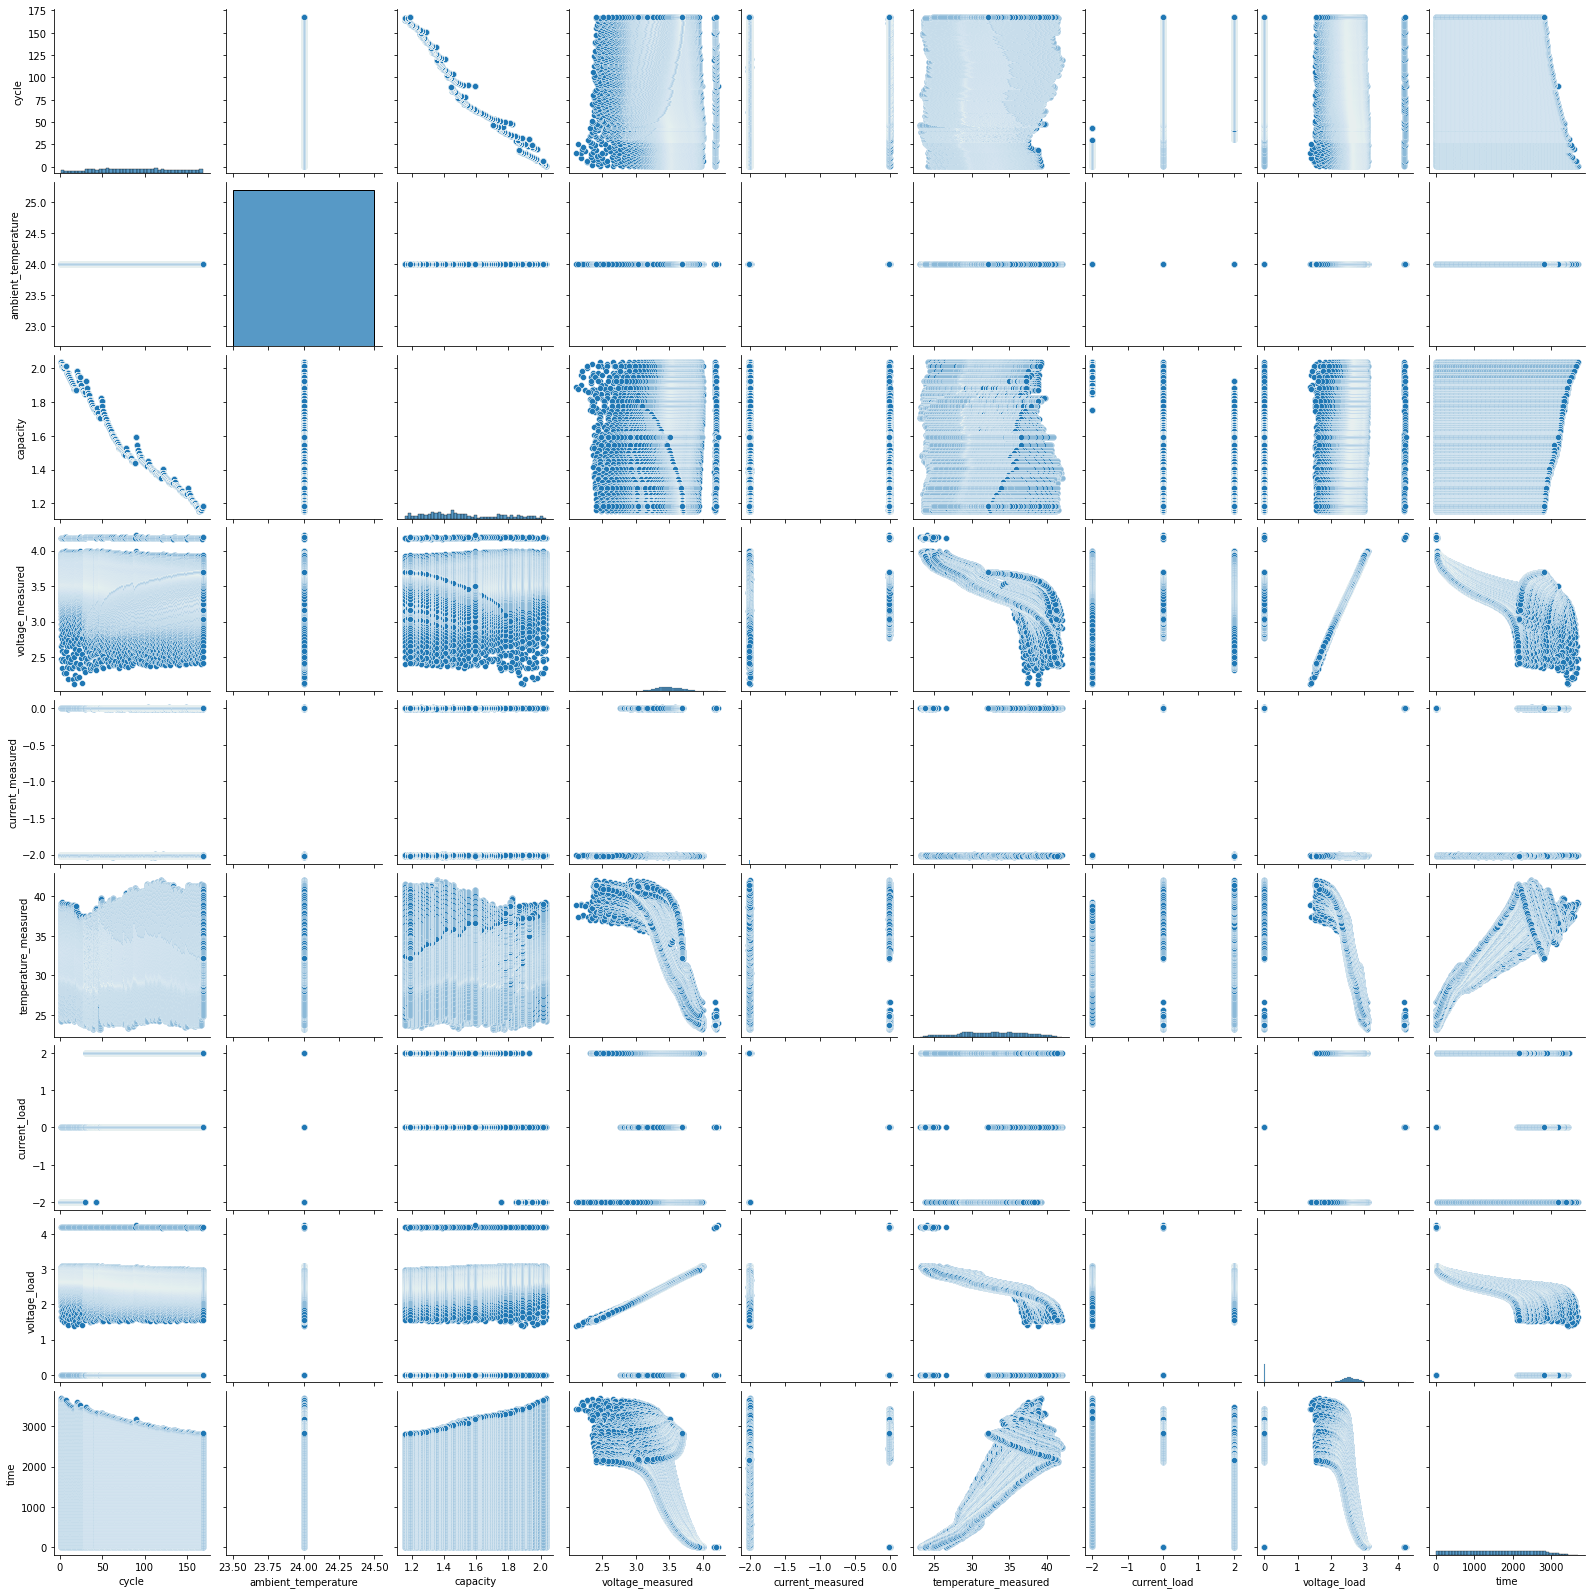

In [51]:
sns.pairplot(data=dataset)

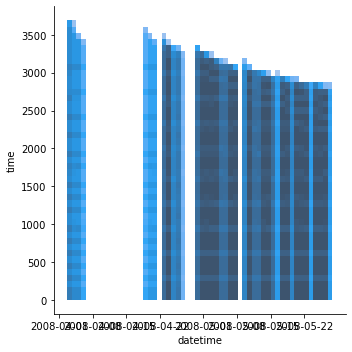

In [52]:
sns.displot(x = "datetime" , y = "time" , data = dataset)

<AxesSubplot:>

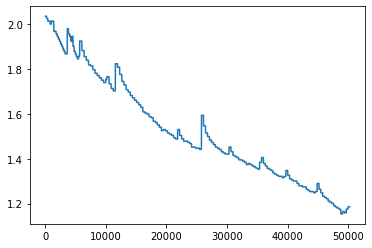

In [53]:
dataset["capacity"].plot()

In [55]:
df5, capacity5 = load_data('B0005')

Total data in dataset:  616


In [58]:
df6, capacity6 = load_data('B0006')

Total data in dataset:  616


In [59]:
df7, capacity7 = load_data('B0007')

Total data in dataset:  616


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

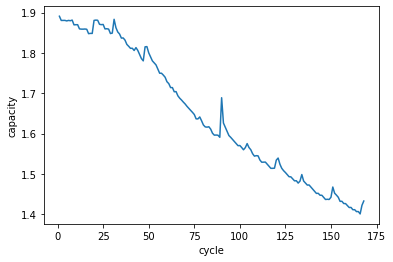

In [68]:
sns.lineplot(x = "cycle", y = "capacity", data= capacity7) 

<AxesSubplot:>

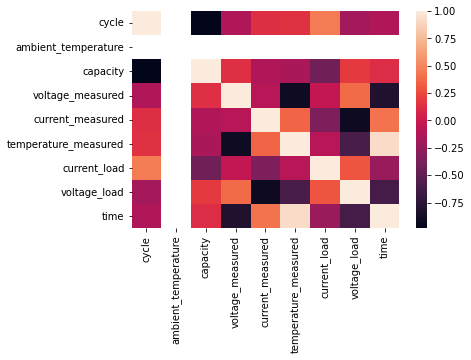

In [66]:
sns.heatmap(df5.corr())

In [87]:
n = 80
df5_train = capacity5.head(int(len(capacity5)*(n/100)))
df5_test = capacity5.tail(int(len(capacity5))-int(len(capacity5)*(n/100)))
X_train = df5_train["cycle"]
X_test = df5_test["cycle"]
y_train = df5_train["capacity"]
y_test = df5_test["capacity"]

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(np.array(X_train).reshape(-1, 1),y_train)

LinearRegression()

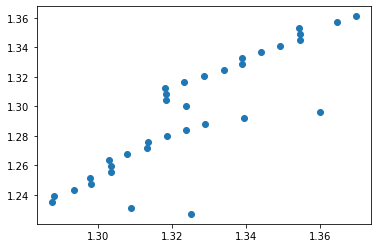

In [89]:
predictions = lm.predict(np.array(X_test).reshape(-1,1))
plt.scatter(y_test,predictions)

In [80]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.029663202151803063
MSE: 0.0011378744453997783
RMSE: 0.03373239459925397


In [90]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.030850788743712727
MSE: 0.0015073792642346182
RMSE: 0.038824982475651144


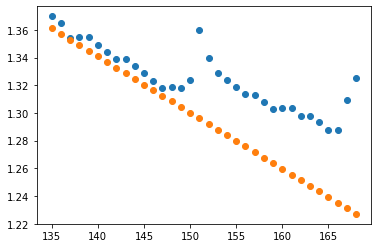

In [94]:
plt.scatter(df5_test["cycle"],df5_test["capacity"])
plt.scatter(df5_test["cycle"],predictions)

In [103]:
predictions

array([1.36112951, 1.35706755, 1.35300559, 1.34894363, 1.34488167,
       1.34081971, 1.33675775, 1.33269579, 1.32863384, 1.32457188,
       1.32050992, 1.31644796, 1.312386  , 1.30832404, 1.30426208,
       1.30020012, 1.29613816, 1.2920762 , 1.28801424, 1.28395228,
       1.27989032, 1.27582836, 1.27176641, 1.26770445, 1.26364249,
       1.25958053, 1.25551857, 1.25145661, 1.24739465, 1.24333269,
       1.23927073, 1.23520877, 1.23114681, 1.22708485])